In [1]:
import numpy as np
from scipy.optimize import fminbound
import matplotlib.pyplot as plt

In [2]:
# Parameters
β = 0.96
α = 0.6

In [3]:
def u(c):
    return np.log(c)

def u_prime(c):
    return 1 / c

def f_prime(k):
    return α * k**(α - 1)

def Bellman_Operator(w, grid):
    
    # Storage Space
    c_star = np.zeros(grid.size)
    v_star = np.zeros(grid.size)
    
    w_func = lambda x: np.interp(x, grid, w)
    
    for i, y in enumerate(grid):
        objective = lambda c: - (u(c) + β * (0.05 * w_func(10 + (y - c) * 0.85) + 0.20 * w_func(10 + (y - c) * 0.95) + 0.55 * w_func(10 + (y - c) * 1.05) + 0.15 * w_func(10 + (y - c) * 1.10) + 0.05 * w_func(10 + (y - c) * 0.85)))
        c_star[i] = fminbound(objective, 1e-5, y)
        v_star[i] = - objective(c_star[i])
        
    return v_star, c_star

def Euler_Equation(c, grid):
    
    # Storage space
    c_star = np.zeros(grid.size)
    
    σ_func = lambda x: np.interp(x, grid, w)
    
    for i, y in enumerate(grid):
        objective = u_prime(c) - β * u_prime(σ_func(y - c)) * f_prime(y - c)
        c_star[i] = brentq(objective, 1e-8, y - 1e-8)
    
    return c_star
            
def sup_norm(v, w):
    
    return (np.abs(v - w)).max()

def compute_fixed_point(w_old, grid, MAXITER, tol=1e-8):
    
    for i in range(MAXITER):
        w_new, c_star = Bellman_Operator(w_old, grid)
        ϵ = sup_norm(w_new, w_old)
        w_old = w_new
        if ϵ < tol:
            break
    return w_old

def compute_fixed_point1(c_old, grid, MAXITER, tol=1e-8):
    
    for i in range(MAXITER):
        c_new = Bellman_Operator(c_old, grid)
        ϵ = sup_norm(c_new, c_old)
        c_old = c_new
        if ϵ < tol:
            break
    return c_old

In [4]:
MAXITER = 500

grid_min = 1e-5
grid_max = 4
grid_size = 200

grid = np.linspace(grid_min, grid_max, grid_size)

w_old = np.zeros(grid.size)

w = compute_fixed_point(w_old, grid, MAXITER)

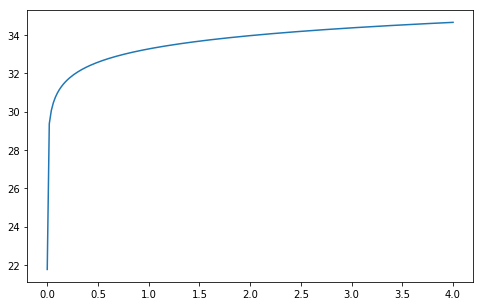

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(grid, w)
plt.show()

In [6]:
MAXITER = 500

grid_min = 1e-5
grid_max = 4
grid_size = 200

grid = np.linspace(grid_min, grid_max, grid_size)

c_old = np.zeros(grid.size)

c = compute_fixed_point1(c_old, grid, MAXITER)

ValueError: object too deep for desired array

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(grid, c)
plt.show()